In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/FP-KK/dataset/train_punctuation_fix.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/FP-KK/dataset/test_baseline_fix_index.csv'
train_df = pd.read_csv(train_path, encoding= 'unicode_escape')
test_df = pd.read_csv(test_path, encoding= 'unicode_escape')
merged_df = train_df.append([test_df])

In [4]:
train_df.drop(['Unnamed: 0'], inplace=True, axis=1)
train_df

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands,O,28285,0
1,Sentence: 1,of,O,15741,0
2,Sentence: 1,demonstrators,O,1523,0
3,Sentence: 1,have,O,367,0
4,Sentence: 1,marched,O,13632,0
...,...,...,...,...,...
730978,Sentence: 44529,power,O,6845,0
730979,Sentence: 44529,as,O,21619,0
730980,Sentence: 44529,alternatives,O,21279,0
730981,Sentence: 44529,to,O,34610,0


In [5]:
test_df.drop(['Unnamed: 0'], inplace=True, axis=1)
test_df

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 4453,In,O,30235,0
1,Sentence: 4453,line,O,27488,0
2,Sentence: 4453,with,O,8856,0
3,Sentence: 4453,IMF,B-org,12526,10
4,Sentence: 4453,conditions,O,9511,0
...,...,...,...,...,...
208755,Sentence: 9999,weight,O,28563,0
208756,Sentence: 9999,in,O,7258,0
208757,Sentence: 9999,gold,O,1317,0
208758,Sentence: 9999,.,O,13264,0


In [6]:
merged_df.drop(['Unnamed: 0'], inplace=True, axis=1)
merged_df

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands,O,28285,0
1,Sentence: 1,of,O,15741,0
2,Sentence: 1,demonstrators,O,1523,0
3,Sentence: 1,have,O,367,0
4,Sentence: 1,marched,O,13632,0
...,...,...,...,...,...
208755,Sentence: 9999,weight,O,28563,0
208756,Sentence: 9999,in,O,7258,0
208757,Sentence: 9999,gold,O,1317,0
208758,Sentence: 9999,.,O,13264,0


In [7]:
# importing the module
import json
 
# Opening JSON file
def loadJSON(filename):
  data = {}
  with open(filename) as json_file:
      data = json.load(json_file)
  return data

In [8]:
idx2tag = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/idx2tag2.json')
tag2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/tag2idx2.json')
token2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/token2idx2.json')
idx2token = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/idx2token2.json')
print(idx2tag)

{'0': 'O', '1': 'I-org', '2': 'B-nat', '3': 'I-eve', '4': 'B-per', '5': 'I-per', '6': 'B-geo', '7': 'B-gpe', '8': 'B-eve', '9': 'I-art', '10': 'B-org', '11': 'I-tim', '12': 'B-art', '13': 'I-gpe', '14': 'I-geo', '15': 'I-nat', '16': 'B-tim', '17': 'ENDPAD'}


In [9]:
tag2idx = dict([key, int(value)] for key, value in tag2idx.items())
token2idx = dict([key, int(value)] for key, value in token2idx.items())
idx2tag = dict([int(key), value] for key, value in idx2tag.items())
idx2token = dict([int(key), value] for key, value in idx2token.items())
tag2idx

{'B-art': 12,
 'B-eve': 8,
 'B-geo': 6,
 'B-gpe': 7,
 'B-nat': 2,
 'B-org': 10,
 'B-per': 4,
 'B-tim': 16,
 'ENDPAD': 17,
 'I-art': 9,
 'I-eve': 3,
 'I-geo': 14,
 'I-gpe': 13,
 'I-nat': 15,
 'I-org': 1,
 'I-per': 5,
 'I-tim': 11,
 'O': 0}

In [10]:
# Groupby and collect columns
train_group = train_df.groupby(['Sentence #'], as_index=False)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))
test_group = test_df.groupby(['Sentence #'], as_index=False)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))
merged_group = merged_df.groupby(['Sentence #'], as_index=False)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [11]:
train_group

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[28285, 15741, 1523, 367, 13632, 7168, 25967, ...","[0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 0, 0, ..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[34424, 1990, 32928, 9794, 31792, 34610, 15641...","[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[28347, 29190, 19208, 2838, 24041, 26531, 7258...","[0, 0, 16, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 10, 0..."
3,Sentence: 1000,"[They, left, after, a, tense, standoff, with, ...","[O, O, O, O, O, O, O, O, O]","[4139, 30932, 1336, 28550, 18536, 26975, 8856,...","[0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,Sentence: 10000,"[relief, coordinator, Jan, Egeland, said, Sund...","[O, O, B-per, I-per, O, B-tim, B-gpe, O, B-gpe...","[25325, 14734, 12754, 18505, 433, 7325, 18620,...","[0, 0, 4, 5, 0, 16, 7, 0, 7, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...
38362,Sentence: 44525,"[President, Bush, called, on, the, United, Sta...","[B-per, I-per, O, O, O, B-geo, I-geo, O, O, O,...","[344, 19638, 28590, 29279, 3894, 18510, 6565, ...","[4, 5, 0, 0, 0, 6, 14, 0, 0, 0, 0, 0, 0, 0, 0,..."
38363,Sentence: 44526,"[Bush, said, dependence, on, foreign, sources,...","[I-per, O, O, O, O, O, O, O, O, B-geo, O, O, O...","[19638, 433, 7527, 29279, 11236, 5495, 15741, ...","[5, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, ..."
38364,Sentence: 44527,"[The, president, called, for, reducing, gasoli...","[O, O, O, O, O, O, O, O, O, O, O, B-tim, O, O,...","[20005, 3610, 28590, 12209, 28521, 30306, 3119...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 16]"
38365,Sentence: 44528,"[He, said, the, goal, can, be, met, by, increa...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[22908, 433, 3894, 32462, 14067, 26107, 19184,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Sebelum melakukan padding, kita akan cari tau distribusi panjang kalimat pada dataset untuk mendapatkan ukuran padding yang menyeimbangkan antara populasi data padding dan jumlah kata yang dibuang

In [12]:
merged_group["Length"] = merged_group["Word"].str.len()
merged_group

,Sentence #,Word,Tag,Word_idx,Tag_idx,Length
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[28285, 15741, 1523, 367, 13632, 7168, 25967, ...","[0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 0, 0, ...",23
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[34424, 1990, 32928, 9794, 31792, 34610, 15641...","[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",23
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[28347, 29190, 19208, 2838, 24041, 26531, 7258...","[0, 0, 16, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 10, 0...",30
3,Sentence: 1000,"[They, left, after, a, tense, standoff, with, ...","[O, O, O, O, O, O, O, O, O]","[4139, 30932, 1336, 28550, 18536, 26975, 8856,...","[0, 0, 0, 0, 0, 0, 0, 0, 0]",9
4,Sentence: 10000,"[relief, coordinator, Jan, Egeland, said, Sund...","[O, O, B-per, I-per, O, B-tim, B-gpe, O, B-gpe...","[25325, 14734, 12754, 18505, 433, 7325, 18620,...","[0, 0, 4, 5, 0, 16, 7, 0, 7, 0, 0, 0, 0, 0, 0,...",30
...,...,...,...,...,...,...
47953,Sentence: 9995,"[Opposition, leader, Mir, Hossein, Mousavi, ha...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...","[5220, 20303, 16135, 20188, 7400, 5052, 433, 2...","[0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",32
47954,Sentence: 9996,"[On, Thursday, ,, Iranian, state, media, publi...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","[30778, 5799, 14320, 34424, 11155, 14159, 3380...","[0, 16, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 10, 1, 0...",25
47955,Sentence: 9997,"[Following, Iran, 's, disputed, June, 12, elec...","[O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ...","[25319, 16791, 13786, 9547, 33484, 30, 22059, ...","[0, 6, 0, 0, 16, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0...",27
47956,Sentence: 9998,"[Since, then, ,, authorities, have, held, publ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[27191, 14187, 14320, 20885, 367, 23014, 7, 64...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21


In [13]:
merged_group.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,47958.0,19.595125,7.357756,1.0,14.0,19.0,24.0,72.0


In [14]:
merged_group.mode(numeric_only=True)

,Length
0,18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f567a8c3590>]],
      dtype=object)

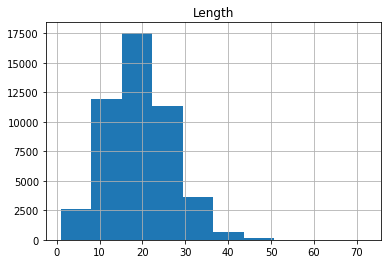

In [15]:
merged_group.hist(column="Length")

Pad the token and tag to get matrix representation of every sentence in the same size

In [16]:
maxlen_merged = 50

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [18]:
def get_pad(dataset_grouped, token2idx, maxlen):

    #get max token and tag length
    n_token = len(token2idx)
    n_tags = 17

    #Pad tokens (X var)    
    tokens = dataset_grouped['Word_idx'].tolist()
    # maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= token2idx["ENDPAD"])

    #Pad Tags (y var) and convert it into one hot encoding
    tags = dataset_grouped['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]

    return pad_tokens, pad_tags, n_token

In [19]:
train_tokens, train_tags, n_token = get_pad(train_group, token2idx, maxlen_merged)
test_tokens,  test_tags, _ = get_pad(test_group, token2idx, maxlen_merged)
train_tags = np.array(train_tags)
test_tags = np.array(test_tags)
print('train_tags: ',train_tags.shape,'test_tags: ',test_tags.shape)

train_tags:  (38367, 50, 17) test_tags:  (9591, 50, 17)


In [20]:
from sklearn.utils import class_weight

train_temp_tags = np.ravel(np.argmax(train_tags, axis=-1))
print(len(train_temp_tags))

1918350


In [21]:
class_weights = class_weight.compute_class_weight(
    class_weight ='balanced', 
    classes = np.unique(train_temp_tags), 
    y = train_temp_tags
    )
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

train_label = np.argmax(train_tags, axis=-1)
print(train_tokens.shape)
print(train_label.shape)

{0: 0.06250837420291926, 1: 8.784377833337912, 2: 874.7606019151847, 3: 578.6877828054298, 4: 10.4090137115634, 5: 8.46288567924545, 6: 4.169990674663125, 7: 9.082752547251998, 8: 480.1877346683354, 9: 490.62659846547314, 10: 7.926673057534337, 11: 42.15320046584192, 12: 382.52243270189433, 13: 752.2941176470588, 14: 19.34912854030501, 15: 3419.51871657754, 16: 8.978685363387877}
(38367, 50)
(38367, 50)


In [22]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input, Dropout
from tensorflow.keras.utils import plot_model

In [23]:
input_dim = len(token2idx)
output_dim = 100
input_length = maxlen_merged
n_tags = 17

In [24]:
def get_bilstm_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length, name="embedding"))
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    model.add(Dropout(0.5))
    model.add((Dense(n_tags, activation="softmax")))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [25]:
print(class_weight_dict)
sample_weights = np.ones(shape=(len(train_label), train_label.shape[-1]))
for i in range(17):
    sample_weights[train_label == i] = class_weight_dict.get(i)
print(sample_weights.shape)

{0: 0.06250837420291926, 1: 8.784377833337912, 2: 874.7606019151847, 3: 578.6877828054298, 4: 10.4090137115634, 5: 8.46288567924545, 6: 4.169990674663125, 7: 9.082752547251998, 8: 480.1877346683354, 9: 490.62659846547314, 10: 7.926673057534337, 11: 42.15320046584192, 12: 382.52243270189433, 13: 752.2941176470588, 14: 19.34912854030501, 15: 3419.51871657754, 16: 8.978685363387877}
(38367, 50)


In [27]:
nlp_model = get_bilstm_lstm_model()
plot_model(nlp_model)
his = nlp_model.fit(train_tokens, train_label , batch_size = 64, epochs=10, validation_split=0.2, sample_weight = sample_weights)
tf.keras.models.save_model(nlp_model, filepath  = '/content/drive/MyDrive/Colab Notebooks/FP-KK/model/BiLSTM_punctuation_fix.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           3517200   
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 200)          160800    
 nal)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 50, 100)           120400    
                                                                 
 dropout_1 (Dropout)         (None, 50, 100)           0         
                                                                 
 dense_1 (Dense)             (None, 50, 17)            1717      
                                                                 
Total params: 3,800,117
Trainable params: 3,800,117
Non-trainable params: 0
____________________________________________

In [ ]:
# Plot results
import matplotlib.pyplot as plt

accuracy = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
nlp_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/FP-KK/model/BiLSTM_punctuation_fix.h5')

y_test = np.argmax(test_tags, axis=-1)
print(test_tokens.shape,y_test.shape)
nlp_model.evaluate(test_tokens, y_test)

In [ ]:
y_pred = nlp_model.predict(test_tokens)
y_pred = np.argmax(y_pred, axis= -1)

In [ ]:
y_test_list = []
y_pred_list = []
for row in range(0, y_test.shape[0]):
  y_pred_list = np.concatenate((y_pred_list, y_pred[row]), axis=0)
  y_test_list = np.concatenate((y_test_list, y_test[row]), axis=0)

In [ ]:
data_prediction = pd.DataFrame({'actual_class': y_test_list, 'predicted_class': y_pred_list})
data_prediction['actual_class'] = data_prediction['actual_class'].map(idx2tag)
data_prediction['predicted_class'] = data_prediction['predicted_class'].map(idx2tag)
data_prediction

In [ ]:
confusion_matrix = pd.crosstab(data_prediction['predicted_class'], data_prediction['actual_class'])
confusion_matrix

In [ ]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(data_prediction['actual_class'], data_prediction['predicted_class'], output_dict=True)).T

Bagaimana jika data padding diabaikan saat menghitung confusion matrix?

In [ ]:
y_pred_list = y_pred.tolist()
y_test_list = y_test.tolist()

In [ ]:
# Clean the test and pred data from padding data
clean_pred = []
clean_test = []
for row in range(0, test_tokens.shape[0]):
  # print(row, test_tokens[row])
  pad_list = []
  for i in range(0, len(test_tokens[row])):
    if(test_tokens[row][i] == token2idx['ENDPAD']):
      pad_list.append(i)

  pad_list.sort(reverse=True)
  for idx in pad_list:
  #   clean_pred[row] = clean_pred[row] + np.delete(y_pred[row], idx)
  #   clean_test[row] = clean_test[row] + np.delete(y_test[row], idx)
    y_pred_list[row].pop(idx)
    y_test_list[row].pop(idx)

In [ ]:
y_test_rows = []
y_pred_rows = []
for row in range(0, y_test.shape[0]):
  # y_pred_list = y_pred_list + y_pred[row]
  y_test_rows = np.concatenate((y_test_rows, y_test_list[row]), axis=0)
  y_pred_rows = np.concatenate((y_pred_rows, y_pred_list[row]), axis=0)

In [ ]:
data_prediction = pd.DataFrame({'actual_class': y_test_rows, 'predicted_class': y_pred_rows})
data_prediction['actual_class'] = data_prediction['actual_class'].map(idx2tag)
data_prediction['predicted_class'] = data_prediction['predicted_class'].map(idx2tag)
data_prediction

In [ ]:
confusion_matrix = pd.crosstab(data_prediction['predicted_class'], data_prediction['actual_class'])
confusion_matrix

In [ ]:
pd.DataFrame(classification_report(data_prediction['actual_class'], data_prediction['predicted_class'], output_dict=True)).T